In [7]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
import xgboost

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.multioutput import MultiOutputRegressor

In [8]:

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [9]:
train_df = pd.read_csv('./train.csv')

<AxesSubplot:>

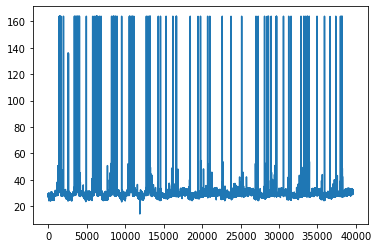

In [10]:
train_df.X_07.plot()

In [11]:
train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

In [12]:
xgb = xgboost.XGBRegressor()

In [13]:
LR = MultiOutputRegressor(xgb).fit(train_x, train_y)
print('Done.')

Done.


In [20]:
test_x = pd.read_csv('./test.csv').drop(columns=['ID'])

In [21]:
preds = LR.predict(test_x)
print('Done.')

Done.


In [ ]:
test_predict = rf_run.predict(train)

print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_y))) )

In [28]:
train_predict = LR.predict(train_x)

print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_y))) )

RMSE':0.9082876660488873


In [29]:
submit = pd.read_csv('./sample_submission.csv')

In [30]:
for idx, col in enumerate(submit.columns):
    if col=='ID':
        continue
    submit[col] = preds[:,idx-1]
print('Done.')

Done.


In [31]:
submit.to_csv('./submit_xgb.csv', index=False)